# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.9.1


# Basic architecture of a NN

* Input layer: same as the number of samples
* Hidden layer: Unlimited, minumum 1
* Output layer: same as the number of desired outputs (number of classes, if regression, 1)

***there are more parameters, they will be covered in more detail latter***

**Regression problem, is simple words, is predicting a number, so lets get going! :)**

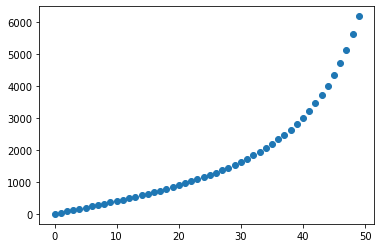

In [2]:
# Lets create some data to fit
X = np.array([number for number in range(0, 50)])

rand = randint(0, 50) # -> Define a fixed random number that will multiply x
Y = np.array([(number * rand) / np.cos(number/rand) for number in X])

# Scater
plt.scatter(X, Y);

**But hold ON! If you try to train the model with this, you will encounter problems, bexause tensorflow 2.7+ requires the data to have at least 2 dimensions, in your case the data has 1 dimension mathematicaly speaking, and 0 ("tensorflowing" speaking)**

***lets fix the data dimensions***

In [3]:
xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.33)

xtr = tf.expand_dims(xtr, axis=-1)
xte = tf.expand_dims(xte, axis=-1)

ytr = tf.expand_dims(ytr, axis=-1)
yte = tf.expand_dims(yte, axis=-1)

**This is odd, but correct, because the input is a scalar, with has 0 dimensions in tensor flow, and the output as 0 dimensions too**

# Models

## How to build a regression neural network?

#### Check bellow!

In [5]:
# Let"s build a model to fit this problem

# Step 1: Create a model: Define the layers (input, hidden, output, and maybe others)

# Set random seed
tf.random.set_seed(32)

# Model
model = tf.keras.Sequential([ # -> Sequential API make the layers in the coded order
    tf.keras.layers.Dense(1) # -> Just one layer (with 1 neuron)
])

# Step 2: Compile the model 
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # See how the model is going with this metric
)

## Define the loss function: The funciton that says how much the model is wrong;
## Define the optimizer: The funcitons that says how your model can improve;
## Dine eval metrics: The functions that can interpret the performance of your model;

# Step 3: Fitting the model: Letting the model find the relations
model.fit(xtr, ytr, epochs=50) # -> How have 50 epochs to learn the patterns

Epoch 1/50
2/2 [==============================] - 0s 0s/step - loss: 1826.4309 - mae: 1826.4309
Epoch 2/50
2/2 [==============================] - 0s 0s/step - loss: 1815.3768 - mae: 1815.3768
Epoch 3/50
2/2 [==============================] - 0s 0s/step - loss: 1804.4382 - mae: 1804.4382
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 1796.7949 - mae: 1796.7949
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 1780.5513 - mae: 1780.5513
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 1763.2102 - mae: 1763.2102
Epoch 7/50
2/2 [==============================] - 0s 0s/step - loss: 1749.0326 - mae: 1749.0326
Epoch 8/50
2/2 [==============================] - 0s 8ms/step - loss: 1737.1427 - mae: 1737.1427
Epoch 9/50
2/2 [==============================] - 0s 0s/step - loss: 1729.6921 - mae: 1729.6921
Epoch 10/50
2/2 [==============================] - 0s 0s/step - loss: 1719.8347 - mae: 1719.8347
Epoch 11/50
2/2 [==================

## How to check model summary?

- after fiting, just call model.summary()

In [27]:
model.summary()

# Model has 1 layer, which is the dense layer (Its building the input layer behind the scene, summary() doent show it)

# it has 2 parameters, wich are the weights and biases, both are trainable for now, because i did not fixed them

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Summary returns:
- The output shape
- The layers and its types
- Trainable parameters: Number of parameters that the model can change while training
- Total parameters: Total number of parameters
- Non-trainable parameters: Freezed parameters, the model will not change these (normal when ussing pre saved models)

What are this parameters?
- Bias
- Weights

Learn more her: https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini

## Making more regression models

## Metrics to validate predictions:

* MAE
* MSE

In [8]:
# Make evaluaction functions
def mse(yhat, ytrue):
    mse_e = tf.keras.losses.MeanSquaredError()
    return mse_e(ytrue, yhat)

def mae(yhat, ytrue):
    mae = tf.keras.losses.MeanAbsoluteError()
    return mae(ytrue, yhat)

def see(yhat, ytrue):
    print(f"Mse: {mse(yhat, ytrue)} | Mae: {mae(yhat, ytrue)}")

## Ways to imporve the firt test model
###### Data Scientists rule of thumb: experiment, experiment, experiment

* Get more data
* Make model larger
* Train for longer periods

**Lets try some things:**
- Model 1: train for longer
- Model 2: more epochs at train, and more layer
- Model 3: train for 500 epochs

## Model 1

Training for longer

In [11]:
# Model 1
tf.random.set_seed(32)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_1.fit(xtr, ytr, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 1826.4309 - mae: 1826.4309
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 1815.3768 - mae: 1815.3768
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 1804.4382 - mae: 1804.4382
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 1796.7949 - mae: 1796.7949
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 1780.5513 - mae: 1780.5513
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 1763.2102 - mae: 1763.2102
Epoch 7/100
2/2 [==============================] - 0s 0s/step - loss: 1749.0326 - mae: 1749.0326
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 1737.1427 - mae: 1737.1427
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 1729.6921 - mae: 1729.6921
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 1719.8347 - mae: 1719.8347
Epoch 11/100
2/2 [=======

In [12]:
# See how your model is going
y_preds_1 = model_1.predict(xte)

see(y_preds_1, yte)

1/1 [==============================] - 0s 37ms/step
Mse: 626321.6875 | Mae: 402.489501953125


## Model 2
Training for longer, and incrasing number of hidden layers

In [13]:
# Model 2
tf.random.set_seed(32)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(batch_size=1, input_shape=(1), name="InputLayer"),
    tf.keras.layers.Dense(10, name="HiddenLayer"),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_2.fit(xtr, ytr, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 0s/step - loss: 1816.0175 - mae: 1816.0175
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 1774.4366 - mae: 1774.4366
Epoch 3/100
2/2 [==============================] - 0s 0s/step - loss: 1699.6813 - mae: 1699.6813
Epoch 4/100
2/2 [==============================] - 0s 0s/step - loss: 1602.2974 - mae: 1602.2974
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 1137.5853 - mae: 1137.5853
Epoch 6/100
2/2 [==============================] - 0s 0s/step - loss: 632.1163 - mae: 632.1163
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 952.4985 - mae: 952.4985
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 993.0396 - mae: 993.0396
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 660.8275 - mae: 660.8275
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 688.1006 - mae: 688.1006
Epoch 11/100
2/2 [===============

In [14]:
# See how your model is going
y_preds_2 = model_2.predict(xte)

see(y_preds_2, yte)

1/1 [==============================] - 0s 40ms/step
Mse: 292507.375 | Mae: 336.7899169921875


## Model 3

Equals to model 1, but with 500 epochs

In [15]:
# Seed
tf.random.set_seed(32)

# Make model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# Compile
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model_3.fit(xtr, ytr, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 1826.4309 - mae: 1826.4309
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 1815.3768 - mae: 1815.3768
Epoch 3/500
2/2 [==============================] - 0s 0s/step - loss: 1804.4382 - mae: 1804.4382
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 1796.7949 - mae: 1796.7949
Epoch 5/500
2/2 [==============================] - 0s 0s/step - loss: 1780.5513 - mae: 1780.5513
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 1763.2102 - mae: 1763.2102
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 1749.0326 - mae: 1749.0326
Epoch 8/500
2/2 [==============================] - 0s 0s/step - loss: 1737.1427 - mae: 1737.1427
Epoch 9/500
2/2 [==============================] - 0s 0s/step - loss: 1729.6921 - mae: 1729.6921
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 1719.8347 - mae: 1719.8347
Epoch 11/500
2/2 [=====

In [16]:
# See how your model is going
y_preds_3 = model_3.predict(xte)

see(y_preds_3, yte)

1/1 [==============================] - 0s 32ms/step
Mse: 306998.09375 | Mae: 406.56842041015625


In [18]:
mse(y_preds_3, yte)

<tf.Tensor: shape=(), dtype=float32, numpy=306998.1>

## Comparing models results

In [28]:
models_results = [
    ["Model1", mae(y_preds_1, yte).numpy(), mse(y_preds_1, yte).numpy()],
    ["Model2", mae(y_preds_2, yte).numpy(), mse(y_preds_2, yte).numpy()],
    ["Model3", mae(y_preds_3, yte).numpy(), mse(y_preds_3, yte).numpy()]
]

model_results = pd.DataFrame(models_results, columns=["model", "mae", "mse"])
model_results

,model,mae,mse
0,Model1,402.489502,626321.68750
1,Model2,336.789917,292507.37500
2,Model3,406.568420,306998.09375


In [29]:
# Model 2 was the better
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer (Dense)         (1, 10)                   20        
                                                                 
 dense_4 (Dense)             (1, 1)                    11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Your main goal is to minimize the time between training sessions, because the more ou try different things and works in cicle, the more you discover the things that dont work, and the more you aproximate the better possible model, remember the machine learning people motto: experiment, experiment, experiment!

This is the reason why you compare models! You try simple models first, see the best, try variatons of the best, take the best, and move on!

Now we are gonna stop testing because this is a course, but in real life, you wold take model 2 and move on with the exprimentations

#### Tracking your experiments (This is a very, very, good practice)

We have tools for this:

* TensorBoard
* Weights & Biases

# Saving your models

2 Ways:

* SavedModel format
* HDF5 format

In [30]:
# Save the model with SavedModel
model_2.save("model2")

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [31]:
# Save with hdf5
model_2.save("model2.h5")

# Load model

In [34]:
# Load from savedModel
l_model = tf.keras.models.load_model("model2")
l_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer (Dense)         (1, 10)                   20        
                                                                 
 dense_4 (Dense)             (1, 1)                    11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Load from h5 five format
h_model = tf.keras.models.load_model("model2.h5")
h_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer (Dense)         (1, 10)                   20        
                                                                 
 dense_4 (Dense)             (1, 1)                    11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Summary of all topics at this module

## Lets do all the steps learned at this notebook again, with a more "real" dataset

In [99]:
# Lets import the necessary modules
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

# Aplly log transofrm at y
# df["charges"] = df["charges"].apply(lambda x: np.log(x))

# X and Y
X = df[[col for col in df.columns if col != "charges"]]
Y = df["charges"]

# Make column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Separate train ans test data
xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.33)

# Apply scaler and encoding with column transformer
xtr = ct.fit_transform(xtr)
xte = ct.transform(xte)

# Make model
tf.random.set_seed(32)

NN = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(11)),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
NN.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

# Fit
history = NN.fit(xtr, ytr, epochs=500)

Epoch 1/500
28/28 [==============================] - 0s 1ms/step - loss: 12973.1172 - mae: 12973.1172
Epoch 2/500
28/28 [==============================] - 0s 1ms/step - loss: 12966.0010 - mae: 12966.0010
Epoch 3/500
28/28 [==============================] - 0s 1ms/step - loss: 12950.5918 - mae: 12950.5918
Epoch 4/500
28/28 [==============================] - 0s 1ms/step - loss: 12921.6396 - mae: 12921.6396
Epoch 5/500
28/28 [==============================] - 0s 1ms/step - loss: 12873.3184 - mae: 12873.3184
Epoch 6/500
28/28 [==============================] - 0s 2ms/step - loss: 12799.6582 - mae: 12799.6582
Epoch 7/500
28/28 [==============================] - 0s 1ms/step - loss: 12694.7188 - mae: 12694.7188
Epoch 8/500
28/28 [==============================] - 0s 2ms/step - loss: 12552.8291 - mae: 12552.8291
Epoch 9/500
28/28 [==============================] - 0s 2ms/step - loss: 12368.2949 - mae: 12368.2949
Epoch 10/500
28/28 [==============================] - 0s 2ms/step - loss: 12135.77

In [100]:
# Plot predictions against real value
print(f"Model performance:\n MAE: {NN.evaluate(xte, yte)[1]}")

14/14 [==============================] - 0s 748us/step - loss: 3424.3584 - mae: 3424.3584
Model performance:
 MAE: 3424.3583984375


14/14 [==============================] - 0s 1ms/step


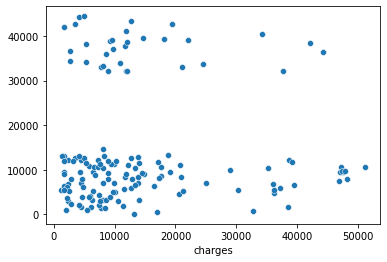

In [102]:
# Model predictions
yhat = pd.Series(NN.predict(xte).ravel())

sns.scatterplot(x=yte, y=yhat);

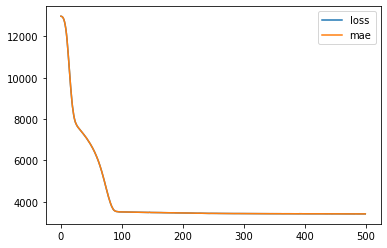

In [103]:
# Plot learning history
pd.DataFrame(history.history).plot();

# --> The loss (y axis) decreases with more epochs, but it gets kinda stuck around epoch 300, consider early stopping